## Definición del problema a analizar


Vamos a analizar de qué manera afectó en el rendimiento de los alumnos vivir en una comuna distinta a la del establecimiento educacional en cada región del país, considerando que vivir en una comuna distinta puede significar mayor tiempo de transporte, más gastos, más cansancio, entre otras en el período del 2018.

Para esto, usaremos datos abiertos provenientes del Centro de Estudios Mineduc. El plan es seleccionar los datos que nos sirven, limpiarlos, separar cada región de Chile y separar aquellos alumnos que viven en la misma comuna que su establecimiento educacional de los que viven en otra. Finalmente, se verá si el promedio de las notas finales de cada grupo varía.


Es importante contestar la pregunta planteada porque, en el caso de que sí se viera alguna correlación, sería una variable que los padres podrían considerar al momento de matricular a sus hijos en el establecimiento educativo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Usar en Google Colab
!gdown --id 158221k62KoEclVDGdlqfiqcmvCxIMZlm

"gdown" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [3]:
data = pd.read_csv('rendimiento_2018.csv', delimiter = ';')
data.head()

C:\Users\danie\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_REG_ALU,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R
0,2018,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15,15101,ARICA,400,410,41001,0,0,Y,T
1,2018,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15,15101,ARICA,400,410,41001,0,0,Y,Y
2,2018,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15,15101,ARICA,400,410,41001,0,0,Y,T
3,2018,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15,15101,ARICA,400,410,41001,"6,4",95,P,P
4,2018,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15,15101,ARICA,400,410,41001,0,0,Y,Y


In [4]:
important_columns = data[['RBD', 'COD_REG_RBD', 'COD_COM_RBD', 'COD_JOR', 'MRUN', 'COD_REG_ALU', 'COD_COM_ALU', 'PROM_GRAL', 'ASISTENCIA']]
important_columns

,RBD,COD_REG_RBD,COD_COM_RBD,COD_JOR,MRUN,COD_REG_ALU,COD_COM_ALU,PROM_GRAL,ASISTENCIA
0,1,15,15101,4,710054,15,15101,0,0
1,1,15,15101,4,4895728,15,15101,0,0
2,1,15,15101,4,7519082,15,15101,0,0
3,1,15,15101,4,7752592,15,15101,"6,4",95
4,1,15,15101,4,8445111,15,15101,0,0
...,...,...,...,...,...,...,...,...,...
3293745,41063,15,15101,2,6322965,15,15101,"6,3",100
3293746,41063,15,15101,2,7947648,15,15101,"6,1",100
3293747,41063,15,15101,2,13843936,15,15101,"6,3",100
3293748,41063,15,15101,2,22987600,15,15101,"5,9",100


In [5]:
important_columns = important_columns.drop(important_columns[important_columns['PROM_GRAL'] == "0"].index)
important_columns.dropna()
important_columns.duplicated().value_counts()
important_columns

,RBD,COD_REG_RBD,COD_COM_RBD,COD_JOR,MRUN,COD_REG_ALU,COD_COM_ALU,PROM_GRAL,ASISTENCIA
3,1,15,15101,4,7752592,15,15101,"6,4",95
8,1,15,15101,4,15856013,15,15101,"5,3",90
15,1,15,15101,4,6103241,15,15101,"6,4",97
16,1,15,15101,4,7828101,15,15101,6,94
17,1,15,15101,4,10645226,15,15101,"5,8",90
...,...,...,...,...,...,...,...,...,...
3293745,41063,15,15101,2,6322965,15,15101,"6,3",100
3293746,41063,15,15101,2,7947648,15,15101,"6,1",100
3293747,41063,15,15101,2,13843936,15,15101,"6,3",100
3293748,41063,15,15101,2,22987600,15,15101,"5,9",100


In [6]:
important_columns['PROM_GRAL'] = important_columns['PROM_GRAL'].apply(lambda x: x.replace(",", ".")).astype(np.float)

C:\Users\danie\AppData\Local\Temp/ipykernel_2576/3552812257.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  important_columns['PROM_GRAL'] = important_columns['PROM_GRAL'].apply(lambda x: x.replace(",", ".")).astype(np.float)


In [7]:
regions_df = {f'reg_{i}': important_columns[important_columns['COD_REG_RBD'] == i] for i in range(1, 17)}

In [8]:
grades_in = {
    f'reg_{i}': regions_df[f'reg_{i}']['PROM_GRAL'][
        regions_df[f'reg_{i}']['COD_COM_ALU'] == regions_df[f'reg_{i}']['COD_COM_RBD']
    ]
    for i in range(1, 17)
}
grades_out = {
    f'reg_{i}': regions_df[f'reg_{i}']['PROM_GRAL'][
        regions_df[f'reg_{i}']['COD_COM_ALU'] != regions_df[f'reg_{i}']['COD_COM_RBD']
    ]
    for i in range(1, 17)
}

In [9]:
grades_out['reg_15']

36         6.4
47         5.2
70         5.2
72         4.9
94         5.1
          ... 
3287448    6.1
3287462    5.0
3287500    6.1
3293744    6.2
3293749    5.4
Name: PROM_GRAL, Length: 4046, dtype: float64

In [10]:
arr_in = np.array([grades_in[f'reg_{i}'].mean() for i in range(1, 17)])
arr_out = np.array([grades_out[f'reg_{i}'].mean() for i in range(1, 17)])

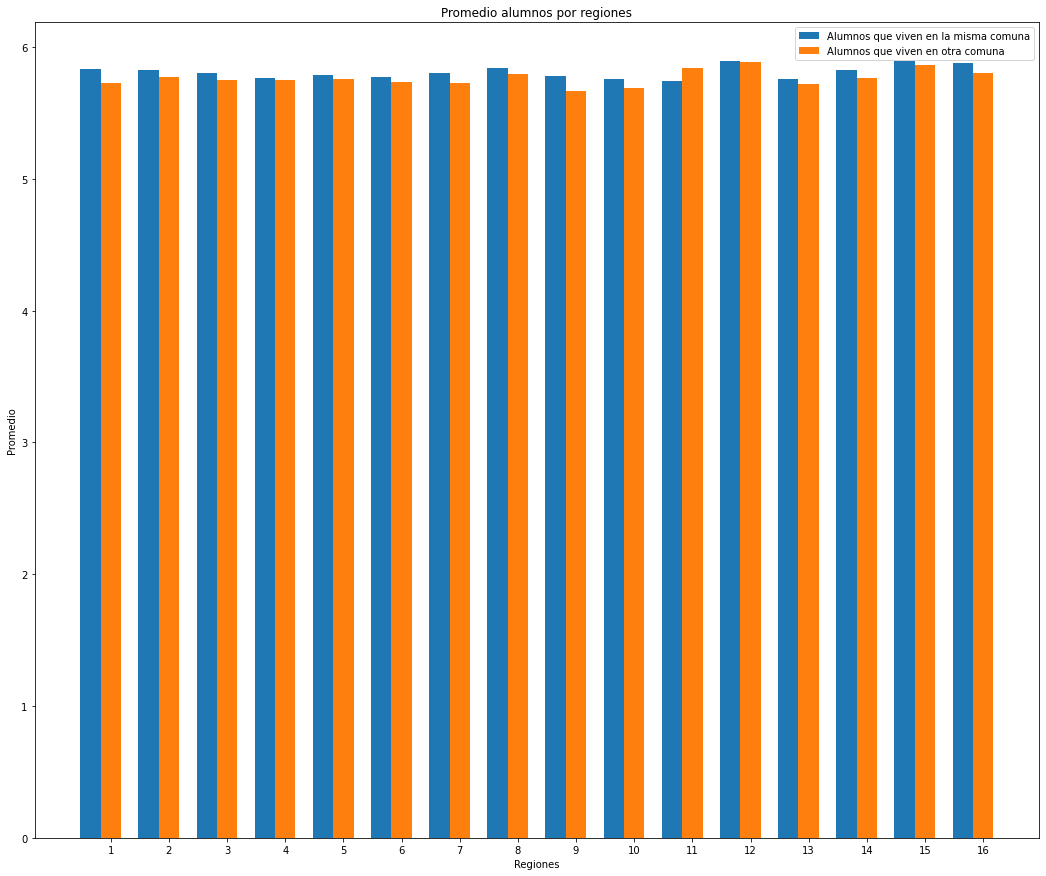

In [11]:
serie_1 = arr_in
serie_2 = arr_out
 
n_groups = len(arr_in)
bars_index = np.arange(n_groups)
bar_width = 0.35

f, ax = plt.subplots(figsize=(18,15))

plt.bar(bars_index, serie_1, width=bar_width, label='Alumnos que viven en la misma comuna')
plt.bar(bars_index + bar_width, serie_2, width=bar_width, label='Alumnos que viven en otra comuna')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(bars_index + bar_width, (f'{i}' for i in range(1, 17)))
 
plt.ylabel('Promedio')
plt.xlabel('Regiones')
plt.title('Promedio alumnos por regiones')
 
plt.show()

Efectivamente se puede notar que hay una diferencia en el rendimiento de los estudiantes según si viven fuera de la comuna del colegio vs si viven en la misma comuna, donde la diferencia favorece al segundo grupo. Sin embargo es muy pequeña, entonces, ¿Qué factores afectan?

### ¿Cuántas entidades hay? ¿Cuantos features? 


In [12]:
data.shape

(3293750, 36)

In [13]:
important_columns.shape

(2998634, 9)

El set de datos completo tiene 36 características y 3293750 entidades. Luego de filtrar y reducir el set de datos, terminamos con 9 features y 2998634 entidades. Solamente se usan tres de las features en el análisis preliminar.

### ¿Son estos features independientes entre si?

In [14]:
important_columns.columns

Index(['RBD', 'COD_REG_RBD', 'COD_COM_RBD', 'COD_JOR', 'MRUN', 'COD_REG_ALU',
       'COD_COM_ALU', 'PROM_GRAL', 'ASISTENCIA'],
      dtype='object')

De las 9 columnas a las cuales se redujo el set de datos, solamente se usaron tres para el análisis: ```COD_COM_RBD```, ```COD_COM_ALU``` y ```PROM_GRAL```, donde la primera corresponde al código de la comuna en la cual se encuentra el colegio, la segunda corresponde al código de la comuna en la cual reside el alumno y la tercer corresponde al promedio general del alumno. Por simple inspección, se puede determinar que las dos primeras columnas tienen una cierta dependencia, dado que un estudiante no puede estudiar en un colegio cuya ubicación esté demasiado lejos de su hogar. Por otra parte, dado el análisis realizado en este informe, se puede concluir que la relación entre las comunas de residencia y de estudio tiene cierta correlación con el promedio general de los estudiantes, donde los estudiantes que viven en la misma comuna del colegio en que estudian tienden a tener mejores notas.

### ¿Por qué este primer análisis era el adecuado para mi proyecto?

Este primer análisis, si bien es el más evidente de realizar, muestra que existe una correlación entre el rendimiento de cada estudiante (medido según el promedio general) y la comuna de residencia con respecto a la comuna del lugar de estudios. De esta manera, este análisis es adecuado para el proyecto porque sienta las bases para el desarrollo de este a futuro.

### ¿Qué limitaciones tiene mi análisis?¿Cómo se podría mejorar?


El análisis es muy simple y lo trabaja con solo dos datos: relación comuna de residencia - comuna de estudio, y promedio general. De esta manera, estamos obviando muchos factores posibles, como por ejemplo la distancia geográfica entre la residencia y el colegio, los tipos de transporte empleados por cada estudiante, factores familiares, edad de los estudiantes, etc. Se puede mejorar el análisis, relacionando más factores y estudiando la influencia de cada uno dentro de este análisis. De esta manera, se puede estudiar cada región por separado, con tal de observar en más detalle el fenómeno estudiado. Es de esperar que la región metropolitana tenga mayor traslado intercomunal de estudiantes a sus colegios que otras regiones, dada la mayor cantidad de comunas conectadas en una sola red de transporte. Sería interesante comprobar esta hipótesis y ver los detalles de la influencia de esto en el rendimiento de los estudiantes.

### ¿Necesito más datos para mi proyecto?

No necesariamente. Sin embargo, este análisis inicial está muy aislado por lo que se puede enriquecer la investigación, comparando con otros años. Por ejemplo, el año 2020, en el cual la mayor parte de la educación se realizó de manera remota, lo que puede haber afectado positiva o negativemente al rendimiento de los estudiantes. También entrarían otros factores, que pueden empujar los resultados en uno u otro sentido.

### ¿Necesito más análisis para mi proyecto?

Sí. Este análisis es muy preliminar y sienta las bases, mediante una pregunta muy simple, de un análisis sociológico de la educación escolar en Chile que puede llegar a niveles muy complejos de estudio. De esta manera, queda claro que hay que seguir profundizando en los distintos factores que pueden afectar a la conclusión de la pregunta planteada y aprovechar el proceso para realizar otras preguntas acerca de la eduación escolar en Chile que aborden asuntos más complejos.